In [66]:
import pandas as pd
import matplotlib.pyplot as plt

def graficar_circular(file):
    """
    Genera un gráfico circular con los valores de la segunda y última columna 
    de un archivo CSV, utilizando los valores de la primera columna como etiquetas.
    Muestra la leyenda, elimina datos duplicados basándose en la primera columna 
    y utiliza el título del archivo como encabezado.

    Args:
        file (str): Ruta al archivo CSV.

    Returns:
        None
    """
    try:
        # Leer el título del archivo (línea 0)
        with open(file, 'r') as f:
            titulo = f.readline().strip()
        
        # Leer el archivo CSV a partir de la línea 2
        df = pd.read_csv(file, header=1)
        
        # Eliminar filas duplicadas basándose en la primera columna
        df = df.drop_duplicates(subset=df.columns[0], )
        
        # Eliminar filas con "TOTAL" en la primera columna
        df = df[~df.iloc[:, 0].str.contains("TOTAL", case=False, na=False)]

        # Extraer las columnas necesarias
        etiquetas = df.iloc[:, 0]  # Primera columna como etiquetas
        columna_segunda = df.iloc[:, 1].replace({',': ''}, regex=True).astype(float)
        columna_ultima = df.iloc[:, -1].replace({',': ''}, regex=True).astype(float)

        # Crear la figura y los subgráficos
        plt.figure(figsize=(14, 7))
        plt.suptitle(titulo, fontsize=16, fontweight='bold')  # Agregar el título principal

        # Gráfico circular para la segunda columna
        plt.subplot(1, 2, 1)
        plt.pie(columna_segunda, labels=None, autopct='%1.1f%%', startangle=90)
        plt.title("Porcentaje Inicios 2020")
        plt.legend(etiquetas, loc='center left', bbox_to_anchor=(1, 0.5))

        # Gráfico circular para la última columna
        plt.subplot(1, 2, 2)
        plt.pie(columna_ultima, labels=None, autopct='%1.1f%%', startangle=90)
        plt.title("Porcentaje Inicios 2023")
        plt.legend(etiquetas, loc='center left', bbox_to_anchor=(1, 0.5))

        # Ajustar diseño para evitar superposición
        plt.tight_layout(rect=[0, 0, 0.85, 0.95])  # Deja espacio para el título y leyendas
        plt.show()

    except Exception as e:
        print(f"Error al generar el gráfico circular: {e}")

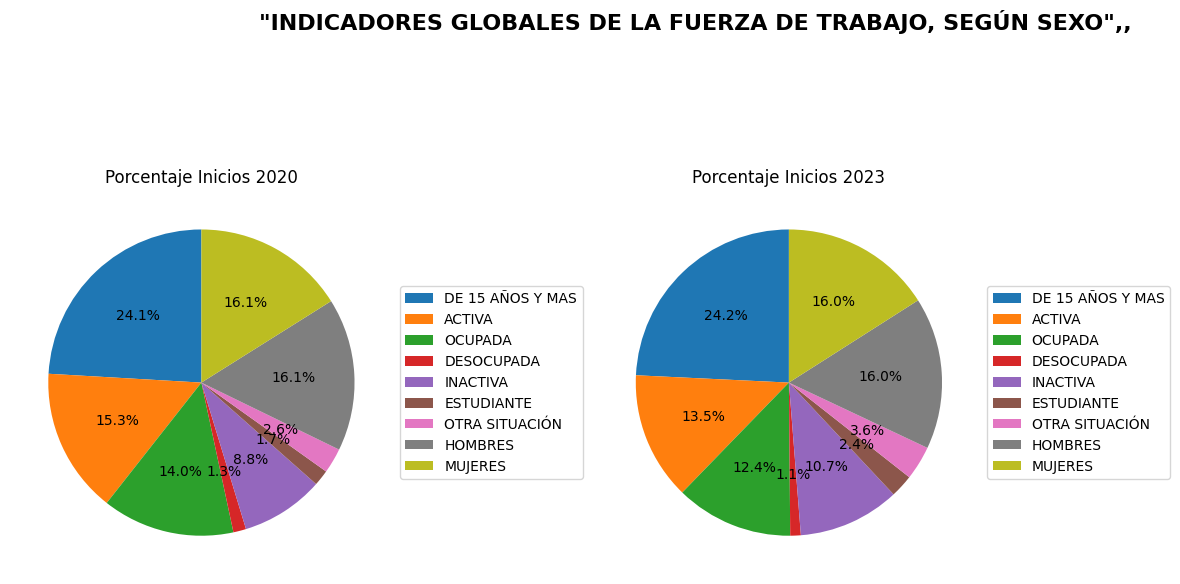

In [67]:
archivo_csv = "../data/processed_wf/Tabulados_Fza_Trabajo - Table 1_filtrado.csv"
graficar_circular(archivo_csv)